# Horror Movie Analysis

In [18]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import requests
import json

#Import API key
from api_keys_DT import geoapify_key

# File to Load (Remember to Change These)
horro_movies_to_load = "resources/IMDB Horror movies.csv"

# Read horror movie Data File and store into Pandas DataFrames
horror_movie_data = pd.read_csv(horro_movies_to_load)

# Combine the data into a single dataset.  
# movie_data_merge = pd.merge(horror_movie_data, <highest grossing>, how="left", on=["?", "?"])
horror_movie_data.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


The r-squared is: 0.051006108742306266


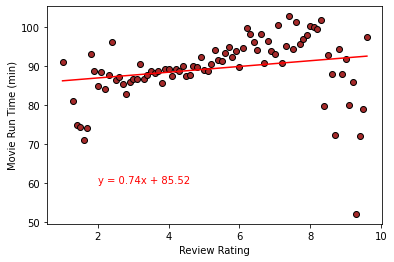

<Figure size 432x288 with 0 Axes>

In [80]:
#Rating vs Movie Duration - Danielle

#create dataframe for 1st question
dtq1_df=horror_movie_data[["Review Rating", "Movie Run Time"]].copy()

#Drop any line of data that has NaN this reduces the data down to just over 1000 data points
dtq1_df.dropna(how="any", inplace=True)

#Change string data to int
dtq1_df["Movie Run Time"] = dtq1_df["Movie Run Time"].str.replace("min","").astype(int)

#calculate average rating and rest index
avg_rating=dtq1_df.groupby(['Review Rating']).mean()
avg_rating.reset_index(drop=False, inplace=True)
avg_rating

#set x and y values
x_values = avg_rating["Review Rating"]
y_values = avg_rating["Movie Run Time"]

#set up trend line and scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values, facecolor="brown", edgecolor="black")
plt.xlabel("Review Rating")
plt.ylabel("Movie Run Time (min)")
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq, (2, 60), color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output/Rating_vs_RunTime.png")

In [4]:
#Rating Vs Location

#DataFrame for second question
dtq2_df=horror_movie_data[["Review Rating", "Filming Locations"]].copy()

#Drop any line of data that has NaN this reduces the data down to just over 1700 data points
dtq2_df.dropna(how="any", inplace=True)
dtq2_df=dtq2_df.reset_index(drop=True)
dtq2_df.head()


,Review Rating,Filming Locations
0,3.9,"New York, USA"
1,3.7,"Baltimore, Maryland, USA"
2,6.5,"Tokyo, Japan"
3,4.6,"Warwick, New York, USA"
4,3.6,"Rochester, New York, USA"


In [5]:
#Add a new column for Lat, Lon, and location type.
dtq2_df["Lat"] = ""
dtq2_df["Lon"] = ""
dtq2_df["Place_id"] = ""
dtq2_df["Location Type"] = ""
dtq2_df.head()

,Review Rating,Filming Locations,Lat,Lon,Place_id,Location Type
0,3.9,"New York, USA",,,,
1,3.7,"Baltimore, Maryland, USA",,,,
2,6.5,"Tokyo, Japan",,,,
3,4.6,"Warwick, New York, USA",,,,
4,3.6,"Rochester, New York, USA",,,,


In [6]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json",
    "limit":20
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [8]:
# Print a message to follow up the airport search
print("Starting Location search")

# Loop through the dtq2_df DataFrame and search coordinates for each city
for index, row in dtq2_df.iterrows():

    # Get the city's name
    location = row["Filming Locations"]
    print(f"starting at {location}")

    # Add the current city to the parameters
    params["text"] = f"{location}"

    # Make the API request
    response = requests.get(base_url, params=params)
    response = response.json() 

    try: 
        dtq2_df.loc[index, "Lat"] = response["results"][0]["lat"]
        dtq2_df.loc[index, "Lon"] = response["results"][0]["lon"]
        dtq2_df.loc[index,"Place_id"] = response["results"][0]["place_id"]
    except:
        print(f'could not find {location}')

# Display sample data to confirm that the coordinates appear
dtq2_df.head()

Starting Location search
stating at New York, USA
stating at Baltimore, Maryland, USA
stating at Tokyo, Japan
stating at Warwick, New York, USA
stating at Rochester, New York, USA
stating at Atlanta, Georgia, USA
stating at Thiruvananthapuram, Kerala, India
stating at Odessa, Texas, USA
stating at Hampshire, England, UK
stating at Utica, New York, USA
stating at Derbyshire, England, UK
stating at San Juan Island, San Juan Islands, Washington, USA
stating at Yorkshire, England, UK
stating at Philadelphia, Pennsylvania, USA
stating at Tehuacana, Texas, USA
stating at Malibu, California, USA
stating at Sanna Movie Ranch - Soledad Canyon Road, Agua Dulce, California, USA
stating at Collingwood, Ontario, Canada
stating at Buffalo, New York, USA
stating at Houston, Texas, USA
stating at Atlanta, Georgia, USA
stating at Gunung Pancar, Indonesia
stating at Dayton, Ohio, USA
stating at Sarasota, Florida, USA
stating at Atlanta, Georgia, USA
stating at Tunisia
stating at Cine International, Rome

stating at St. Louis, Missouri, USA
stating at Colmenar Viejo, Madrid, Spain
stating at Moscow, Russia
stating at New York City, New York, USA
stating at Anoka, Minnesota, USA
stating at Santiago, Chile
stating at Cologne, North Rhine-Westphalia, Germany
stating at Chicago, Illinois, USA
stating at Petersburg, Virginia, USA
stating at Miami, Florida, USA
stating at Bedford, Bedfordshire, England, UK
stating at Blackwood, New Jersey, USA
stating at San Francisco, California, USA
stating at Los Angeles, California, USA
stating at Joshua Tree National Park, California, USA
stating at Amager, Denmark
stating at Toronto, Ontario, Canada
stating at Sirsa, Haryana, India
stating at Zuri Residences, Dolores, Taytay, Rizal, Philippines
stating at Amparo, São Paulo, Brazil
stating at Rochester Hills, Michigan, USA
stating at Stockholm, Stockholms län, Sweden
stating at Belfast, County Antrim, Northern Ireland, UK
stating at Adelanto, California, USA
stating at Springdale, New Brunswick, Canada
s

stating at Vancouver, British Columbia, Canada
stating at Chicago, Illinois, USA
stating at Greensboro, North Carolina, USA
stating at Philadelphia, Pennsylvania, USA
stating at Los Angeles, California, USA
stating at Grand Rapids, Michigan, USA
stating at Big Bear Lake, Big Bear Valley, San Bernardino National Forest, California, USA
stating at Silver City, New Mexico, USA
stating at Erie, Pennsylvania, USA
stating at Richmond, Virginia, USA
stating at Vermont, USA
stating at Texas, USA
stating at Burbank, California, USA
stating at Wales, UK
stating at Western Heights, Los Angeles, California, USA
stating at Houston, Texas, USA
stating at Orlando, Florida, USA
stating at Madrid, Spain
stating at Crone Wood, Ireland
stating at Palani, Tamil Nadu, India
stating at Los Angeles, California, USA
stating at Ñuñoa, Santiago, Chile
stating at Racine, Wisconsin, USA
stating at Heath, Ohio, USA
stating at Istanbul, Turkey
stating at York, North Yorkshire, England, UK
stating at Tampa, Florida,

stating at Michigan, USA
stating at Los Angeles, California, USA
stating at Bhangarh, India
stating at Lafayette, Indiana, USA
stating at Houston, Texas, USA
stating at 8590 N. Kitchen Rd. Moooresville, Indiana, USA
stating at Santa Monica, California, USA
stating at Atlanta, Georgia, USA
stating at Los Angeles, California, USA
stating at Salisbury, Pennsylvania, USA
stating at Lake District, Cumbria, England, UK
stating at Sacramento, California, USA
stating at Pinugay, Baras, Rizal, Philippines
stating at London, England, UK
stating at Baltimore, Maryland, USA
stating at Los Angeles, California, USA
stating at Hopkinsville, Kentucky, USA
stating at Antioch, California, USA
stating at Los Angeles, California, USA
stating at Cheyenne Studios - 27567 Fantastic Lane, Castaic, California, USA
stating at France
stating at Germany
stating at Iquitos, Peru
stating at Corpus Christi, Texas, USA
stating at Memphis, Tennessee, USA
stating at Japan
stating at Long Island, New York, USA
stating a

stating at Imphal, India
stating at South Pittsburg, Tennessee, USA
stating at Adria, Rovigo, Veneto, Italy
stating at Cavite, Philippines
stating at Stratford-upon-Avon, Warwickshire, England, UK
stating at Fullerton, California, USA
stating at Lima, Lima, Peru
stating at Lafayette, Louisiana, USA
stating at Vancouver, British Columbia, Canada
stating at Utica, New York, USA
stating at Rockaway Beach, Queens, New York City, New York, USA
stating at Mugla, Turkey
stating at Utah, USA
stating at Austin, Texas, USA
stating at Columbus, Ohio, USA
stating at Los Angeles, California, USA
stating at Eleuthera Island, Bahamas
stating at Lake Hughes, California, USA
stating at Laos
stating at Hollywood, Los Angeles, California, USA
stating at Fykse, Norway
stating at Orlando, Florida, USA
stating at Abington, Massachusetts, USA
stating at New York City, New York, USA
stating at Budafoki Film Studios, Budapest, Hungary
could not find Budafoki Film Studios, Budapest, Hungary
stating at St. Peter

stating at Crocodiles Nightclub, 1745 Prescott Rd, Modesto, California, USA
stating at Los Angeles, California, USA
stating at Tokyo, Japan
stating at Tehran, Iran
stating at Los Angeles, California, USA
stating at Universal Studios Hollywood - 1000 Universal Studios Blvd, Universal City, California, USA
stating at Denver, Colorado, USA
stating at Los Angeles, California, USA
stating at Effort, Pennsylvania, USA
stating at Vancouver, British Columbia, Canada
stating at Istanbul, Turkey
stating at Polperro, Cornwall, England, UK
stating at Bulgaria
stating at Pasadena, California, USA
stating at Los Angeles, California, USA
stating at Lizzie Borden Bed & Breakfast, Fall River, Massachusetts, USA
stating at County Cork, Ireland
stating at Gary, Indiana, USA
stating at Dallas, Texas, USA
stating at Los Angeles, California, USA
stating at California, USA
stating at Orlando, Florida, USA
stating at Wendover, Nevada, USA
stating at Downtown, Los Angeles, California, USA
stating at Canning, N

stating at Hagerstown, Maryland, USA
stating at Crestline, California, USA
stating at Muskegon, Michigan, USA
stating at Prescott, Arizona, USA
stating at St. Louis, Missouri, USA
stating at Calabasas, California, USA
stating at Guelph, Ontario, Canada
stating at Madrid, Spain
stating at Los Angeles, California, USA
stating at Baton Rouge, Louisiana, USA
stating at Amsterdam, Noord-Holland, Netherlands
stating at Snoqualmie Pass, Washington, USA
stating at Glasgow, Scotland, UK
stating at Malibu, California, USA
stating at Monroe County, Indiana, USA
stating at Craco, Matera, Basilicata, Italy
stating at Portland, Oregon, USA
stating at New Zealand
stating at Austin, Texas, USA
stating at Burbank, California, USA
stating at Birmingham, West Midlands, England, UK
stating at Yorkshire, England, UK
stating at Vancouver, British Columbia, Canada
stating at La Salle, Michigan, USA
stating at Houston, Texas, USA
stating at Los Angeles, California, USA
stating at Dayton, Ohio, USA
stating at 

stating at Dallas, Texas, USA
stating at Southampton, New York, USA
stating at Southampton, Hampshire, England, UK
stating at Kent, Connecticut, USA
stating at Victoria, Australia
stating at Ireland
stating at Los Angeles, California, USA
stating at Clearlake, California, USA
stating at Vilnius, Lithuania
stating at Cancun, Mexico
stating at Namibia
stating at Reykjavík, Iceland
stating at Ras Al-Khaimah, United Arab Emirates
stating at Pinewood Toronto Studios, Port Lands, Toronto, Ontario, Canada
stating at Dundurn, Saskatchewan, Canada
stating at British Columbia, Canada
stating at Montréal, Québec, Canada
stating at Los Angeles, California, USA
stating at Los Angeles, California, USA
stating at São Paulo, São Paulo, Brazil
stating at Caracas, Venezuela
stating at Chulmleigh Village, Devon, England, UK
stating at Los Angeles, California, USA
stating at Glendale, California, USA
stating at Cardiff, South Glamorgan, Wales, UK
stating at Austin, Texas, USA
stating at Hamilton, Ontario,

stating at Kiosk, Ontario, Canada
stating at 534 Lewis Street, Monroe, Washington, USA
stating at Luxury Lodges Wales, Grandstand, Trefeglwys, Powys, Wales, UK
stating at London, England, UK
stating at Melbourne, Victoria, Australia
stating at Bulgaria
stating at Baton Rouge, Louisiana, USA
stating at Bogotá, Colombia
stating at Los Angeles, California, USA
stating at Los Angeles, California, USA
stating at British Columbia Institute of Technology - Aerospace Technology Campus, 3800 Cessna Drive, Richmond, British Columbia, Canada
stating at Cargill Park-7700 Lotus Lane, Shreveport, Lousiana, USA
stating at Wilmington, North Carolina, USA
stating at Riverview, Coquitlam, British Columbia, Canada
stating at Sutton, Québec, Canada
stating at Santa Clarita, California, USA
stating at Ventura, California, USA
stating at Stone Street Studios, Stone Street, Miramar, Wellington, New Zealand
stating at Pinewood Toronto Studios, Port Lands, Toronto, Ontario, Canada
stating at Philadelphia, Penn

stating at Santa Clarita, California, USA
stating at Vancouver, British Columbia, Canada
stating at Los Angeles, California, USA
stating at Louisiana, USA
stating at Essex, England, UK
stating at Kure Beach, North Carolina, USA
stating at Greenfield Village - 20900 Oakwood Boulevard, Dearborn, Michigan, USA
stating at Newcastle, County Down, Northern Ireland, UK
stating at Goa, India
stating at Los Angeles, California, USA
stating at Los Angeles, California, USA
stating at Black Park, Iver Heath, Buckinghamshire, England, UK
stating at London, England, UK
stating at Los Angeles, California, USA
stating at Toronto, Ontario, Canada
stating at Simmos beach Recreation Reserve, NSW, Australia
stating at Wales, UK
stating at Bulgaria
stating at Palazzo Vecchio, Piazza della Signoria, Florence, Tuscany, Italy
stating at Mandeville, Louisiana, USA
stating at Amman, Jordan
stating at Cambridge, Ontario, Canada
stating at Hudson Valley, New York, USA
stating at Toronto, Ontario, Canada
stating a

,Review Rating,Filming Locations,Lat,Lon,Place_id,Location Type
0,3.9,"New York, USA",40.68295,-73.9708,513cbd5296217e52c059cf66d5e76a574440c00208e203...,
1,3.7,"Baltimore, Maryland, USA",39.290882,-76.610759,5136afeaac162753c0590b81b79b3ba54340f00101f901...,
2,6.5,"Tokyo, Japan",35.695126,139.75391,511344dd072078614059b64c86e3f9d84140c00208e203...,
3,4.6,"Warwick, New York, USA",41.279079,-74.420444,512a73f38de89a52c0590d0055dcb8a34440c00208e203...,
4,3.6,"Rochester, New York, USA",43.157285,-77.615214,51a5828aaa5f6753c059609335ea21944540f00101f901...,


In [9]:
params = {
    "categories": 'populated_place',
    "apiKey":geoapify_key,
}
# Print a message to follow up the search
print("Location type search")


#iterate through the DataFrame
for index, row in dtq2_df.iterrows():
    #get place_id
    place_id=row["Place_id"]

     # Add filter on current city place_id
    params["filter"] = f"place:{place_id}"

    # Base URL:
    base_url2= "https://api.geoapify.com/v2/places"

     # Make and API request using the params dictionaty
    name_address = requests.get(base_url2, params=params)
   # print(name_address)
    # Convert the API response to JSON format
    name_address = name_address.json()
    #print(json.dumps(name_address, indent = 4, sort_keys=True))

#Try
    try:
        dtq2_df.loc[index, "Location Type"] = name_address["features"][0]["properties"]["datasource"]["raw"]["place"]
    except (KeyError, IndexError):
        dtq2_df.loc[index,"Location Type"] = "Not found"

    print(f"{dtq2_df.loc[index, 'Filming Locations']} - Type: {dtq2_df.loc[index, 'Location Type']}") 
    
dtq2_df

Location type search
New York, USA - Type: city
Baltimore, Maryland, USA - Type: neighbourhood
Tokyo, Japan - Type: quarter
Warwick, New York, USA - Type: region
Rochester, New York, USA - Type: neighbourhood
Atlanta, Georgia, USA - Type: neighbourhood
Thiruvananthapuram, Kerala, India - Type: city
Odessa, Texas, USA - Type: region
Hampshire, England, UK - Type: village
Utica, New York, USA - Type: region
Derbyshire, England, UK - Type: village
San Juan Island, San Juan Islands, Washington, USA - Type: region
Yorkshire, England, UK - Type: village
Philadelphia, Pennsylvania, USA - Type: city_block
Tehuacana, Texas, USA - Type: region
Malibu, California, USA - Type: region
Sanna Movie Ranch - Soledad Canyon Road, Agua Dulce, California, USA - Type: region
Collingwood, Ontario, Canada - Type: town
Buffalo, New York, USA - Type: region
Houston, Texas, USA - Type: suburb
Atlanta, Georgia, USA - Type: neighbourhood
Gunung Pancar, Indonesia - Type: village
Dayton, Ohio, USA - Type: region
Sa

Jämtlands län, Sweden - Type: city
Chicago, Illinois, USA - Type: village
Rio de Janeiro, Rio de Janeiro, Brazil - Type: municipality
Chicago, Illinois, USA - Type: village
India - Type: town
Palmdale, California, USA - Type: region
Gwrych Castle, Abergele, Conwy, Wales, UK - Type: hamlet
New York, USA - Type: city
Dublin, County Dublin, Ireland - Type: quarter
AVM Studios, Chennai, Tamil Nadu, India - Type: neighbourhood
Comunitat Valenciana, Spain - Type: village
Bootheel, New Mexico, USA - Type: region
Prommitr Film Studio, Karnchanaburi, Thailand - Type: Not found
Toronto, Ontario, Canada - Type: city
Karachi, Pakistan - Type: neighbourhood
England, UK - Type: town
Chennai, Tamil Nadu, India - Type: neighbourhood
Ham Lake, Minnesota, USA - Type: region
Rome, Lazio, Italy - Type: city
Mojave, California, USA - Type: region
St. Louis, Missouri, USA - Type: neighbourhood
Colmenar Viejo, Madrid, Spain - Type: state
Moscow, Russia - Type: city
New York City, New York, USA - Type: city
A

USA - Type: Not found
New York City, New York, USA - Type: city
Helsinki, Finland - Type: allotments
South Wales, Wales, UK - Type: village
Spiderwood Studios, Austin, Texas, USA - Type: region
Chicago, Illinois, USA - Type: village
Xcaret, Mexico - Type: municipality
Camino, California, USA - Type: region
England, UK - Type: town
Lethbridge, Alberta, Canada - Type: city
Los Angeles, California, USA - Type: city
Los Angeles, California, USA - Type: city
Værløse, Sjælland, Denmark - Type: hamlet
Scotland, UK - Type: region
Elgin, Texas, USA - Type: region
Provence-Alpes-Côte d'Azur, France - Type: town
Hollywood, California, USA - Type: region
Tokyo, Japan - Type: quarter
Fair Game Store 5147 Main Street Downers Grove, Illinois, USA - Type: region
Miami, Florida, USA - Type: city
Chatham, Ontario, Canada - Type: city
Tirana, Albania - Type: city
Los Angeles, California, USA - Type: city
Pittsburgh, Pennsylvania, USA - Type: neighbourhood
Morcín, Asturias, Spain - Type: village
Pittsburg

Hamburg, New York, USA - Type: region
Dallas, Texas, USA - Type: neighbourhood
Frazier Park, California, USA - Type: region
Glauchau, Saxony, Germany - Type: town
Pasadena, California, USA - Type: region
Wisconsin, USA - Type: city
Foxborough, Massachusetts, USA - Type: region
Buenos Aires, Federal District, Argentina - Type: district
Lancaster, California, USA - Type: region
Sheffield, South Yorkshire, England, UK - Type: hamlet
Las Vegas, Nevada, USA - Type: region
Lubbock, Texas, USA - Type: region
Providence, Rhode Island, USA - Type: region
Bernardsvile, New Jersey, USA - Type: town
Michigan, USA - Type: city
Winnipeg, Manitoba, Canada - Type: neighbourhood
Gran Alacant, Alicante, Spain - Type: region
Fischer, Texas, USA - Type: region
Warminsko-Mazurskie, Poland - Type: hamlet
England, UK - Type: town
Málaga, Málaga, Andalucía, Spain - Type: neighbourhood
Hollywood, California, USA - Type: region
New York City, New York, USA - Type: city
Fremont, Wisconsin, USA - Type: region
Oly

Sudbury, Ontario, Canada - Type: city
Canterbury, Connecticut, USA - Type: village
Kentucky, USA - Type: village
London, England, UK - Type: city
Muriwai Beach, Woodhill Forest, Woodhill, Auckland, New Zealand - Type: city
Hollywood, Los Angeles, California, USA - Type: city
Quintana Roo, Mexico - Type: city
Manhattan, New York City, New York, USA - Type: city
Morocco - Type: city
London, Ontario, Canada - Type: city
Kerang, Victoria, Australia - Type: state
Kingston, Ontario, Canada - Type: city
Lumby, British Columbia, Canada - Type: village
Sächsische Schweiz, Saxony, Germany - Type: region
Brentwood, Essex, England, UK - Type: city
Vancouver, British Columbia, Canada - Type: neighbourhood
Chiloe, Chile - Type: neighbourhood
Ridgecrest, California, USA - Type: city
Garfield Heights, Ohio, USA - Type: region
Surrey, England, UK - Type: village
Rochester, New York, USA - Type: neighbourhood
Tarapoto, Peru - Type: city
Grand Rapids, Michigan, USA - Type: region
Los Angeles, California,

Toluca Lake, Los Angeles, California, USA - Type: city
Aurora, Colorado, USA - Type: region
Córdoba, Argentina - Type: suburb
Nova Scotia, Canada - Type: municipality
Canberra, Australian Capital Territory, Australia - Type: suburb
Hollywood, California, USA - Type: region
Ashwaubenon, Wisconsin, USA - Type: region
Los Angeles, California, USA - Type: city
Newcastle upon Tyne, Tyne and Wear, England, UK - Type: city
Baton Rouge, Louisiana, USA - Type: region
Los Angeles, California, USA - Type: city
Wellsboro, Pennsylvania, USA - Type: region
La Plata, Buenos Aires, Federal District, Argentina - Type: district
Vienna, Austria - Type: city
Ritchie County, West Virginia, USA - Type: region
North Vancouver, British Columbia, Canada - Type: region
Mayfield, New York, USA - Type: region
Cornwall, England, UK - Type: village
Los Angeles, California, USA - Type: city
New York City, New York, USA - Type: city
Dallas, Texas, USA - Type: neighbourhood
New Orleans, Louisiana, USA - Type: region
M

Los Angeles, California, USA - Type: city
Terminal Island, Wilmington, Los Angeles, California, USA - Type: city
Pisa, Tuscany, Italy - Type: hamlet
Los Angeles, California, USA - Type: city
Agua Dulce, California, USA - Type: region
Israel - Type: city
Ashford, Kent, England, UK - Type: region
Bodmin Moor, Cornwall, England, UK - Type: town
Las Termas de Chillán, Chile - Type: hamlet
Bowthorpe Park Farm, Lincolnshire, UK - Type: neighbourhood
Taneyville, Missouri, USA - Type: region
Austin, Texas, USA - Type: region
Owen Sound, Ontario, Canada - Type: city
Bilbao, Bilbao, Vizcaya, País Vasco, Spain - Type: region
Bedford, Virginia, USA - Type: region
Santa Clarita, California, USA - Type: region
Miami, Florida, USA - Type: city
Bangkok, Thailand - Type: city
Surrey, England, UK - Type: village
Tampa, Florida, USA - Type: neighbourhood
Los Angeles, California, USA - Type: city
Cairo, Egypt - Type: city
Hollywood, California, USA - Type: region
Budapest, Hungary - Type: neighbourhood
Ba

Winnipeg, Canada - Type: neighbourhood
Collingwood, Ontario, Canada - Type: town
Stord, Norway - Type: county
Belgium - Type: town
Chicago, Illinois, USA - Type: village
Fortified Church of Biertan, Biertan, Sibiu County, Romania - Type: county
Tokyo, Japan - Type: quarter
Boonsboro, Maryland, USA - Type: region
USA - Type: Not found
Catania, Sicily, Italy - Type: city
Los Angeles, California, USA - Type: city
Edinboro, Pennsylvania, USA - Type: region
Berlin, Germany - Type: city
Wisconsin, USA - Type: city
Vernon, British Columbia, Canada - Type: city
Los Angeles, California, USA - Type: city
New Orleans, Louisiana, USA - Type: region
Clappers Lane, Henfield, East Sussex, England, UK - Type: hamlet
Rhode Island, USA - Type: town
Johor Baru, Johor, Malaysia - Type: town
Cortlandt Alley, Chinatown, Manhattan, New York City, New York, USA - Type: city
Acton, California, USA - Type: region
Phoenix, Arizona, USA - Type: city
Los Angeles, California, USA - Type: city
Los Angeles, Californi

Ruabon, Wrexham, Wales, UK - Type: village
Los Angeles, California, USA - Type: city
New York, USA - Type: city
Downtown Los Angeles, California, USA - Type: region
Los Angeles, California, USA - Type: city
San Bernardino National Forest, California, USA - Type: region
Thyborøn, Jylland, Denmark - Type: village
Portland, Oregon, USA - Type: suburb
Erie, Pennsylvania, USA - Type: region
Butte, Montana, USA - Type: region
Santa Clarita, California, USA - Type: region
Los Angeles, California, USA - Type: city
Spiderwood Studios, Austin, Texas, USA - Type: region
Lithuania - Type: city
Santa Clarita, California, USA - Type: region
Paris, France - Type: city
Portsmouth, Ohio, USA - Type: region
Johns Creek, Georgia, USA - Type: region
Colombia - Type: town
New York City, New York, USA - Type: city
Orrius, Barcelona, Catalonia, Spain - Type: region
Jerusalem, Israel - Type: city
Hamilton, Ontario, Canada - Type: city
Britannia Beach, British Columbia, Canada - Type: region
Vancouver, British

Hamilton, Ontario, Canada - Type: city
Hertfordshire, England, UK - Type: village
North Carolina, USA - Type: neighbourhood
Los Angeles County, California, USA - Type: city
Los Angeles, California, USA - Type: city
Manitoba Production Centre, Winnipeg, Manitoba, Canada - Type: neighbourhood
Detroit, Michigan, USA - Type: city
Estonia - Type: suburb
Austin, Texas, USA - Type: region
Atlanta, Georgia, USA - Type: neighbourhood
Los Angeles, California, USA - Type: city
2606 N. Madison Avenue, Altadena, California, USA - Type: region
Mobile, Alabama, USA - Type: region
Pittsburgh, Pennsylvania, USA - Type: neighbourhood
Nebraska, USA - Type: region
Spokane, Washington, USA - Type: suburb
Los Angeles, California, USA - Type: city
La Canada Flintridge, California, USA - Type: region
Prague, Czech Republic - Type: suburb
Cape Town, South Africa - Type: suburb
Los Angeles, California, USA - Type: city
Connecticut, USA - Type: city
Toronto, Ontario, Canada - Type: city
Atlanta, Georgia, USA - T

Palazzo Vecchio, Piazza della Signoria, Florence, Tuscany, Italy - Type: city
Mandeville, Louisiana, USA - Type: region
Amman, Jordan - Type: city
Cambridge, Ontario, Canada - Type: city
Hudson Valley, New York, USA - Type: region
Toronto, Ontario, Canada - Type: city
California, USA - Type: city
Santa Clarita, California, USA - Type: region
Terrassa, Barcelona, Catalonia, Spain - Type: city
Los Angeles, California, USA - Type: city
Adelaide, South Australia, Australia - Type: state
Vancouver, British Columbia, Canada - Type: neighbourhood
Cooperstown, New York, USA - Type: region
Cleveland, Ohio, USA - Type: region
Dalton Mill, Keighley, West Yorkshire, England, UK - Type: town
El Dorado Park, Long Beach, California, USA - Type: region
Historic West Adams, Los Angeles, California, USA - Type: city
Los Angeles, California, USA - Type: city
City of Manchester, Connecticut, USA - Type: town
Margaretville, New York, USA - Type: region
Savannah, Georgia, USA - Type: region
California, USA 

,Review Rating,Filming Locations,Lat,Lon,Place_id,Location Type
0,3.9,"New York, USA",40.68295,-73.9708,513cbd5296217e52c059cf66d5e76a574440c00208e203...,city
1,3.7,"Baltimore, Maryland, USA",39.290882,-76.610759,5136afeaac162753c0590b81b79b3ba54340f00101f901...,neighbourhood
2,6.5,"Tokyo, Japan",35.695126,139.75391,511344dd072078614059b64c86e3f9d84140c00208e203...,quarter
3,4.6,"Warwick, New York, USA",41.279079,-74.420444,512a73f38de89a52c0590d0055dcb8a34440c00208e203...,region
4,3.6,"Rochester, New York, USA",43.157285,-77.615214,51a5828aaa5f6753c059609335ea21944540f00101f901...,neighbourhood
...,...,...,...,...,...,...
1955,6.3,"New Orleans, Louisiana, USA",29.975998,-90.078213,517028d76f018556c0599c734b06dbf93d40f00101f901...,region
1956,6.0,"London, England, UK",51.507322,-0.127647,51e5af3500c056c0bf59b5858cecefc04940f00101f901...,city
1957,4.6,"Winnipeg, Manitoba, Canada",49.895537,-97.138458,51d1f69e80dc4858c059136f53f2a0f24840f00101f901...,neighbourhood
1958,3.0,"Zagreb, Croatia",45.813185,15.977177,51d7c79e9850f42f4059c50dae6f16e84640f00101f901...,city


In [10]:
#export to a csv file to read if needed as runing the above code took over and hour
dtq2_df.to_csv("output/location_type.csv")

In [75]:
all_location_type_df=dtq2_df.groupby(["Location Type"]).mean()
location_type_df=all_location_type_df.drop(index="Not found")
location_type_df


,Review Rating
Location Type,
allotments,4.600000
borough,6.266667
city,5.052880
city_block,4.880000
county,5.284211
district,5.025000
hamlet,4.587500
municipality,5.450000
neighbourhood,5.116000


In [78]:
x_axis_list=list(location_type_df.index.values)
x_axis_list

['allotments',
 'borough',
 'city',
 'city_block',
 'county',
 'district',
 'hamlet',
 'municipality',
 'neighbourhood',
 'province',
 'quarter',
 'region',
 'state',
 'subdistrict',
 'suburb',
 'town',
 'village']

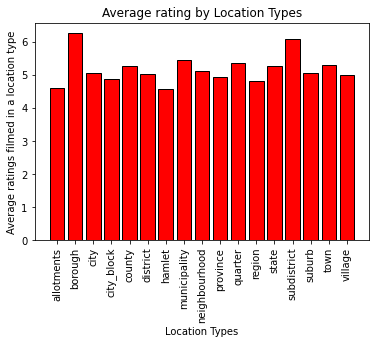

In [82]:
#set up plot

x_axis=np.arange(len(location_type_df))
y_axis=location_type_df["Review Rating"]

plt.bar(x_axis, y_axis, color=["red"], edgecolor=["black"], alpha=1, align="center") 

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis_list, rotation=90)


plt.title("Average rating by Location Types")
plt.xlabel("Location Types")
plt.ylabel("Average ratings filmed in a location type")
plt.savefig("output/Average_rating_by_location_tye.png")